## Stats by La Liga teams

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stats = pd.read_csv("dataset-laliga.csv")
stats

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,NaN,Hodei Oleaga,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0.0,0.0,0,0,0
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0.0,0.0,0,0,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,82.00%,31,82.00%,31,...,0,0,25,6,19,887.0,128.0,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,18.00%,7,18.00%,7,...,0,0,3,2,1,155.0,49.0,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,32.00%,11,29.00%,11,...,0,15,107,38,69,536.0,457.0,78,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,Villarreal CF,Midfielder,37.0,Iván Martín,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0.0,0.0,0,0,0
552,Villarreal CF,Midfielder,42.0,Andrei Ratiu,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0.0,0.0,0,0,0
553,Villarreal CF,Forward,7.0,Gerard,2.317,35,92.00%,16,42.00%,25,...,0,23,344,219,125,740.0,676.0,59,5,6
554,Villarreal CF,Forward,9.0,Bacca,1.259,33,87.00%,2,5.00%,12,...,1,4,127,80,47,270.0,252.0,16,2,5


In [3]:
# Exploring the columns
stats.columns

Index(['Team', 'Position', 'Shirt number', 'Name', 'Minutes played',
       'Games played', 'Percentage of games played', 'Full games played',
       'Percentage of full games played', 'Games started',
       'Percentage of games started', 'Games where substituted',
       'Percentage of games where substituted', 'Yellow Cards', 'Red Cards',
       'Second Yellows', 'Goals scored', 'Penalties scored', 'Own goals',
       'Goals conceded while player on pitch', 'Tackles', 'Interceptions',
       'Recoveries', 'Clearances', 'Successful tackles',
       'Unssuccessful tackles', 'Last man', 'Successful duels', 'Duels lost',
       'Successful aerial challenges', 'Unsuccessful aerial challenges',
       'Offsides', 'Fouls suffered', 'Fouls committed', 'Penalties won',
       'Penalties given away', 'Handballs committed',
       'Fouls committed per card', 'Shots', 'Shots on target', 'Assists',
       'Successful dribbles', 'Unsuccessful dribbles', 'Goals scored.1',
       'From inside the a

In [4]:
# Finding the 5 teams that had the most "Red Cards"
stats.groupby("Team")["Red Cards"].sum().nlargest(5)

Team
Rayo Vallecano    8
Levante UD        7
Getafe CF         6
RC Celta          6
Real Madrid       6
Name: Red Cards, dtype: int64

In [5]:
# Finding the average number of "Long passes" made by each Position (Goalkeeper, Forward, etc.)
stats.groupby("Position")["Long passes"].mean()

Position
Defender      102.610811
Forward        23.787234
Goalkeeper    242.157895
Midfielder     60.445455
Name: Long passes, dtype: float64

In [6]:
# Finding the 10 shirt numbers (players) that scored the most goals
stats.groupby("Shirt number")["Goals scored"].sum().nlargest(10)

Shirt number
9.0     169
10.0    117
7.0     101
19.0     69
11.0     56
22.0     47
12.0     45
17.0     38
23.0     27
8.0      23
Name: Goals scored, dtype: int64

## Plotting

In [8]:
# Creating a dataframe with "Total shots" and "Shots on target"

shots = stats.groupby("Team").agg(
    total=("Shots", sum),
    on_target=("Shots on target", sum)
)

In [9]:
shots["accuracy"] = shots["on_target"] / shots["total"]

Text(0.5, 0, 'On Target Percentage')

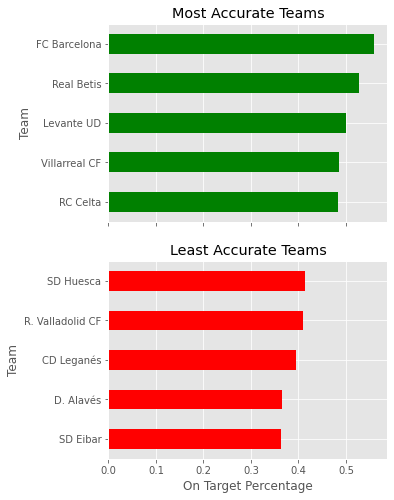

In [10]:
plt.style.use("ggplot")
fig, axs = plt.subplots(2,1, figsize=(5,8), sharex=True)
shots["accuracy"].nlargest().sort_values(ascending=True).plot(
    kind="barh", 
    ax=axs[0],
    color="green",
    title="Most Accurate Teams"
)
shots["accuracy"].nsmallest().plot(
    kind="barh", 
    ax=axs[1],
    color="red",
    title="Least Accurate Teams"
)
plt.xlabel("On Target Percentage")